# About the dataset

## Clustering the countries by using unsupervised learning for HELP International

### Objective:
To categorize the countries using socio-economic and health factors that determine the overall development of the country.

### About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

### Problem statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your job as a Data Scientist is to categorize the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

## Features description
- `country`: Name of the country
- `child_mort`: Death of children under 5 years of age per 1000 live births
- `exports`: Exports of goods and services per capita. Given as percentage of the GDP per capita.
- `health`: Total health spending per capita. Given as percentage of GDP per capita.
- `imports`: Imports of goods and services per capita. Given as percentage of the GDP per capita.
- `income`: net income per person
- `inflation`: the measurement of the annual growth rate of the total GDP
- `life_expec`: the average number of years a new born child would live if the current mortality patterns are to remain the same
- `total_fer`: the number of children that would be born to each woman if the current age-fertility rates remain the same.
- `gdpp`: the GDP per capita. Calculated as the total GDP divided by the total population.

In [1]:
# setup
import pandas as pd

In [2]:
filepath = "dataset/kaggle_data/Country-data.csv"

data = pd.read_csv(filepath)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


There is no missing values. There are 9 numerical features. 

In [4]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Correlation matrix

In [6]:
num_df = data.select_dtypes(include='number')
num_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
num_df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [11]:
!pip install --upgrade seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   -------------------------------------- 294.6/294.6 kB 789.8 kB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


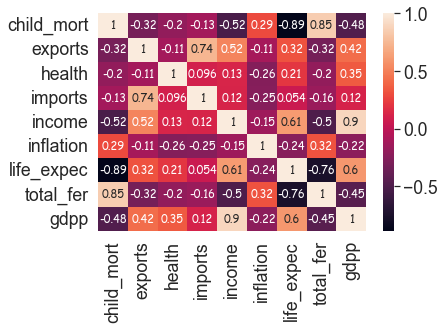

In [16]:
import matplotlib.pyplot as plt
import seaborn as sn

corr_mat = num_df.corr()
sn.heatmap(corr_mat, annot=True, annot_kws={'fontfamily': 'cursive',
                                            'fontsize': 'xx-small'})
plt.show()

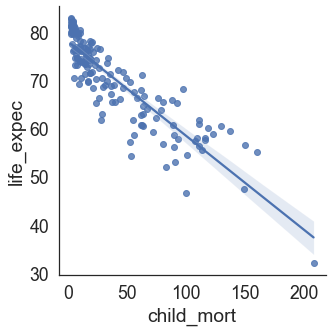

In [17]:
# correlogram of child_mort and life_expec
sn.lmplot(x="child_mort", y="life_expec", data=num_df)

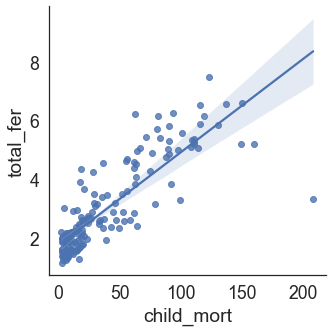

In [18]:
sn.lmplot(x="child_mort", y="total_fer", data=num_df)

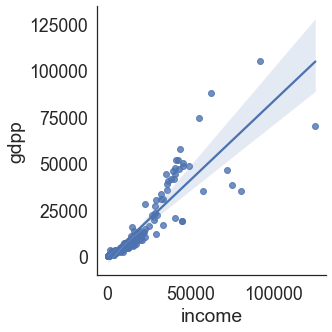

In [19]:
sn.lmplot(x="income", y="gdpp", data=num_df)

## Data clustering

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline

### Preprocess data (standardization)

In [29]:
scaler = MinMaxScaler()
data_standard = scaler.fit_transform(num_df.to_numpy())
data_standard[:5]

array([[0.42648491, 0.04948197, 0.35860783, 0.25776487, 0.00804721,
        0.12614361, 0.47534517, 0.73659306, 0.00307343],
       [0.06815969, 0.13953104, 0.29459291, 0.27903729, 0.07493307,
        0.08039922, 0.87179487, 0.07886435, 0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, 0.18014926, 0.0988094 ,
        0.1876906 , 0.87573964, 0.27444795, 0.04036499],
       [0.56669912, 0.31112456, 0.06463642, 0.24626626, 0.04253523,
        0.24591073, 0.55226824, 0.79022082, 0.03148832],
       [0.03748783, 0.22707876, 0.2622747 , 0.33825512, 0.14865223,
        0.05221329, 0.8816568 , 0.15457413, 0.11424181]])

### Select best k based on elbow method

In [30]:
# loop through 2-20 k
wcsos = []
sil_scores = []

for k in range(2, 21):
    clust = KMeans(n_clusters=k, random_state=k+100)
    res = clust.fit(data_standard)
    wcsos.append(res.inertia_)
    sil_scores.append(silhouette_score(num_df.to_numpy(), res.labels_))

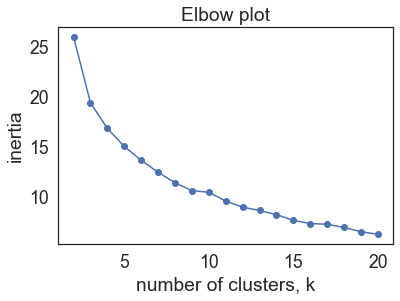

In [31]:
plt.plot(range(2, 21), wcsos, '-o')
plt.xlabel("number of clusters, k")
plt.ylabel("inertia")
plt.title("Elbow plot")
plt.show()

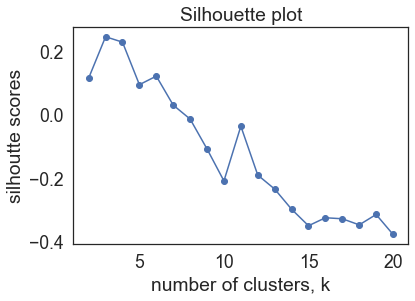

In [32]:
plt.plot(range(2, 21), sil_scores, '-o')
plt.xlabel("number of clusters, k")
plt.ylabel("silhoutte scores")
plt.title("Silhouette plot")
plt.show()

Both plots suggest that the best k should be 3.

### Set up the pipeline

In [33]:
# min-max scaler and k-means clustering
scaler = MinMaxScaler()
k_means = KMeans(n_clusters=3, random_state=103)

pipe = Pipeline([('scale', scaler), ('cluster', k_means)])

res = pipe.fit(num_df.to_numpy())

In [34]:
res

Pipeline(steps=[('scale', MinMaxScaler()),
                ('cluster', KMeans(n_clusters=3, random_state=103))])

In [35]:
res[1].labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [37]:
# Append the predicted label on the original dataframe
final_df = pd.concat([data, pd.DataFrame(res[1].labels_)], axis=1)
final_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,0
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [43]:
final_df.rename({0: "k_means_labels"}, axis=1, inplace=True)
final_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


## Results analysis

### Visualization with PCA

In [44]:
from sklearn.decomposition import PCA

In [56]:
pca_dim_red = PCA(n_components=2, whiten=True, random_state=42)
pca_dim_red.fit(num_df.to_numpy())

PCA(n_components=2, random_state=42, whiten=True)

In [57]:
pca_dim_red.explained_variance_ratio_

array([0.94792307, 0.05207346])

In [58]:
pca_dim_red.explained_variance_

array([6.70739440e+08, 3.68465803e+07])

In [59]:
data_red = pca_dim_red.transform(num_df.to_numpy())

data_red.shape

(167, 2)

The countries for blue:
                  country
7               Australia
8                 Austria
15                Belgium
23                 Brunei
29                 Canada
42                 Cyprus
43         Czech Republic
44                Denmark
53                Finland
54                 France
58                Germany
60                 Greece
68                Iceland
73                Ireland
74                 Israel
75                  Italy
77                  Japan
82                 Kuwait
91             Luxembourg
98                  Malta
110           Netherlands
111           New Zealand
114                Norway
122              Portugal
123                 Qatar
133             Singapore
134       Slovak Republic
135              Slovenia
138           South Korea
139                 Spain
144                Sweden
145           Switzerland
157  United Arab Emirates
158        United Kingdom
159         United States
The countries for green:
               

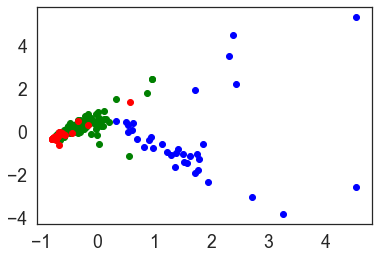

In [62]:
import numpy as np
colors = ["blue", "green", "red"]

for i in np.unique(res[1].labels_):
    data_group = data_red[res[1].labels_==i, :]
    plt.scatter(data_group[:, 0], data_group[:, 1], color=colors[i])
    print(f"The countries for {colors[i]}:")
    print(final_df[["country"]].loc[res[1].labels_==i])
    
plt.show()

### Analysis with real data + k-means results

In [64]:
final_df.iloc[:, 1:].groupby(["k_means_labels"]).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
k_means_labels,,,,,,,,,
0,4.897143,58.431429,8.917429,51.508571,45802.857143,2.535000,80.245714,1.741143,43117.142857
1,22.425581,40.382430,6.215581,46.932162,12770.813953,7.609023,72.582558,2.293256,6719.790698
2,93.284783,29.287174,6.338478,43.297826,3516.804348,12.097065,59.393478,5.090217,1695.913043
